<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 1</h2>

In [ ]:
# Student names and numbers:


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

In [1]:
# Import all necessary libraries here
import numpy as np
import pandas as pd
import sklearn as sk
import mglearn
import graphviz
import pydotplus
import datetime
import itertools


from sklearn import metrics
from sklearn.svm import SVC
#from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz




D:\Softs\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Softs\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Exercise 1: Decision trees

In this exercise we investigate the Boston Housing dataset, which we treat as a classification problem:

In [63]:
from sklearn.datasets import load_boston
data = load_boston()

c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=5)

In [82]:
#print(data.DESCR)
pd.DataFrame(data.data,columns = data.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### Model learning
**a)** Learn a decision tree using the training data and evaluate its performance on both the training data and the test data. Generate random training/test partitions or varying sizes and analyze how the accuracy results vary (consult the documentation for `train_test_split(.)`).

In [72]:
#a)
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, c_train)
print("Accuracy on training data: {}".format(clf.score(X_train, c_train)))
print("Accuracy on testing data: {}".format(clf.score(X_test, c_test)))


Accuracy on training data: 0.9709762532981531
Accuracy on testing data: 0.8740157480314961


### Model analysis

**b)** Display the decision tree learned using the training data.

**c)** What are the most important features as determined by the learned tree and does, e.g., the choice of top node seem reasonable to you?

**d)** How does the features deemed *most important* by the decision tree learner match the generated tree and your understanding of house prices?

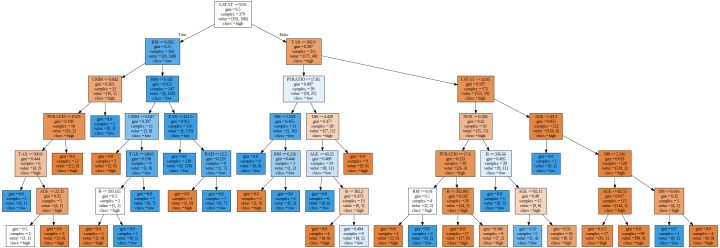

In [80]:
#b)
dot_data = export_graphviz(clf, out_file=None,
                           class_names=["high","low"],
                           feature_names=data.feature_names, 
                           filled=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

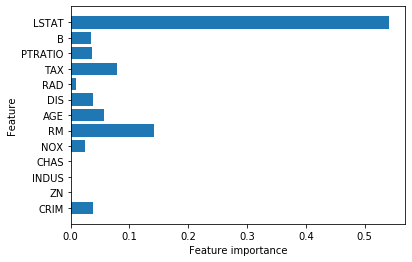

In [81]:
def plot_feature_importances_cancer(model):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(clf)

### Model complexity

**e)** Try controlling the complexity of the learned decision tree by adjusting the parameters max\_depth, min\_samples\_split, min\_samples\_leaf

**f)** Investigate the effect when changing these parameters:
    - Visualize (some of) the trees
    - Evaluate the performance of the models on both the training data and the test data
    
**g)** Try to find good parameter values using cross-validation. How does the obtained parameters match your manual investigation?

# Exercise 2: Regression with random forest

For this exercise we will use the nycflights dataset ("flights.csv").

So far, we have only considered how to use decision trees and random forests for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

**a)** Load the data, and consider how you want to handle missing values and categorical variables (you may choose to remove some features entirely). Carefully consider which variables are categorical. Normalize all relevant variables.

**b)** In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

In [ ]:
#a)


### Regression analysis: Predicting departure time delays

**c)** Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

**d)** Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

**e)** Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

**f)** Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

**g)** Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

**h)** Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

**i)** Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

# Exercise 3: SVM

In this exercise we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0-9 at a resolution of 28x28 pixels. In the cell below, the dataset is loaded and split into 60000 traning and 10000 testing images, and reshaped into the appropriate shape for an SVM classifier.

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

Using TensorFlow backend.


In [36]:
d = 9
print(len(y_train[y_train==d]))
print(len(y_test[y_test==d]))

5949
1009


The code-snippet below can be used to see the images corresponding to individual digits:

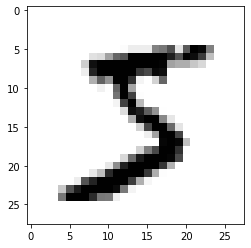

In [42]:
index = 0

plt.imshow(x_train[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first training datapoint now is: 0


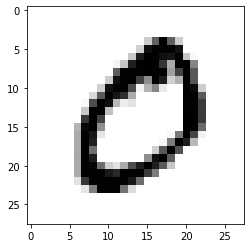


12665
12665
2115
2115


In [91]:
# '0' vs. '1'
digit0=0
digit1=1

"""
in order to decrease the learning time it was decided to normalize the data by dividing to 255.0
the data will end being in a range from 0 – 1 as floating numbers
"""
x_bin_train=x_train[np.logical_or(y_train==digit0,y_train==digit1)]/255.0
y_bin_train=y_train[np.logical_or(y_train==digit0,y_train==digit1)]

x_bin_test=x_test[np.logical_or(y_test==digit0,y_test==digit1)]/255.0
y_bin_test=y_test[np.logical_or(y_test==digit0,y_test==digit1)]

print("The first training datapoint now is: " + str(y_bin_train[0]))
plt.imshow(x_bin_train[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print()

print(len(x_bin_train))
print(len(y_bin_train))
print(len(x_bin_test))
print(len(y_bin_test))

### Training an SVM model

**a)** Learn different SVM models by varying e.g. the kernel functions and/or the C- and gamma-parameters. For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

**b)** Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? (Hint: you can e.g. use the numpy where() function to extract the indices of the test cases that were misclassified: `misclass = np.where(test != predictions)` )
 

**c)** How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

**d)** Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset (no coding required in this exercise!).

**e)** Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [94]:
#a) kernel='rbf'

begin_time = datetime.datetime.now()
svm_5  = SVC(C=0.5, gamma='scale', cache_size=10000)
svm_5.fit(x_bin_train, y_bin_train)
print("run time for C - {} & gamma - {} = {}".format(0.5,0.2,datetime.datetime.now() - begin_time))
print("Accuracy on training data = {}".format(svm_5.score(x_bin_train, y_bin_train)))
print("Accuracy on testing data = {}\n".format(svm_5.score(x_bin_test, y_bin_test)))

run time for C - 0.5 & gamma - 0.2 = 0:00:07.429012
Accuracy on training data = 0.9996052112120016
Accuracy on testing data = 0.9990543735224586



In [95]:
print(len(x_bin_train[0]))

784


a) << comment section >>
With linear kernel the time of learning the model differ much when the C parameter has distinct values, but the model seems to underfit the data.
With the poly kernel the time of learning the model does not differ much when the C and degree parameters have distinct values, but the model has a low accuracy on both training and testing data
The best option seems to be the RBF kernel. To achieve a good accuracy and time on learning the model, it is necessary to tune correctly the C and gamma parameters, otherwise it is a big risk of underfitting or overfitting the model to the data.

In [8]:
#b) Inspect some misclassified cases
y_pred_5 = svm_5.predict(x_bin_test)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix."""
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')    

Confusion matrix, without normalization
[[ 980    0]
 [  63 1072]]


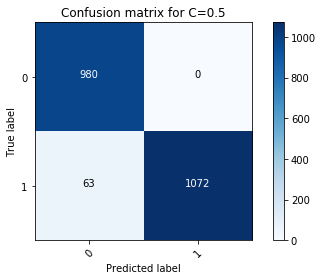

In [9]:
cm_5 = metrics.confusion_matrix(y_bin_test, y_pred_5)
plot_confusion_matrix(cm_5, ["0", "1"], normalize=False, title='Confusion matrix for C=0.5')

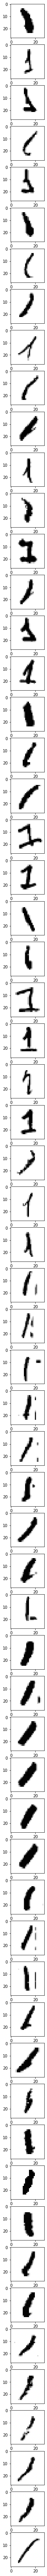

In [19]:
misclass = np.where((y_pred_5 == 0) & (y_bin_test == 1))[0]
fig = plt.figure(figsize=(5, 120))
for i in range(len(misclass)):
    ax = fig.add_subplot(len(misclass), 1, i+1)
    imgplot = ax.imshow(np.reshape(x_bin_test[misclass[i],:], (28, 28)), cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()

b)  << comment section >>
From the misclassified cases predicted as 0 but their true label being 1 about 15 misclassified cases can be still recognized by human reader, other cases correspond to hard to heir label to be recognized.

In [21]:
#c) '4' vs. '5'

digit0=4
digit1=5

x_bin_train=x_train[np.logical_or(y_train==digit0,y_train==digit1)]/255.0
y_bin_train=y_train[np.logical_or(y_train==digit0,y_train==digit1)]

x_bin_test=x_test[np.logical_or(y_test==digit0,y_test==digit1)]/255.0
y_bin_test=y_test[np.logical_or(y_test==digit0,y_test==digit1)]
        
for gamma in [.005, .01, .02]:
    begin_time = datetime.datetime.now()
    svm = SVC(C=.005, gamma = gamma, cache_size=10000).fit(x_bin_train, y_bin_train)
    print("run time for C - .005; gamma - {} = {}".format(gamma,datetime.datetime.now() - begin_time))        
    print("Accuracy on training data = {}".format(svm.score(x_bin_train, y_bin_train)))
    print("Accuracy on testing data = {}\n".format(svm.score(x_bin_test, y_bin_test)))

run time for C - .005; gamma - 0.005 = 0:01:23.451675
Accuracy on training data = 0.9753174109917429
Accuracy on testing data = 0.9786552828175027

run time for C - .005; gamma - 0.01 = 0:01:14.158367
Accuracy on training data = 0.9830418183432478
Accuracy on testing data = 0.9850586979722519

run time for C - .005; gamma - 0.02 = 0:01:20.245924
Accuracy on training data = 0.9879250643700612
Accuracy on testing data = 0.9882604055496265



c) << comment section >>
Using the same hyperparameter values as in ‘0’ & ‘1’ case will result in overfitting the model to the data. The accuracy on training data will be 100% while accuracy on testing data will be around 55%.
After learning different models for ‘4’ & ‘5’ case by varying the C & gamma parameters, the risk of underfitting could not be avoided. This could be due to digits from the ‘MNIST’ dataset, which seem pretty much the same to the model.

d) << comment section >>
A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest 
approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all 
of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers 
are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is 
returned as the prediction.

In [22]:
#e)
begin_time = datetime.datetime.now()
svm  = SVC(C=0.7, gamma='scale' , cache_size=10000).fit(x_train/255.0, y_train)
print("run time for C - 0.7 & gamma - 'scale' = {}".format(datetime.datetime.now() - begin_time))
print("Accuracy on training data = {}".format(svm.score(x_train/255.0, y_train)))
print("Accuracy on testing data = {}\n".format(svm.score(x_test/255.0, y_test)))

y_pred = svm.predict(x_test/255.0)

run time for C - 0.7 & gamma - 'scale' = 0:18:34.642043
Accuracy on training data = 0.9864833333333334
Accuracy on testing data = 0.9771



Confusion matrix, without normalization
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   5    2 1005    2    1    0    2    9    5    1]
 [   0    0    2  993    0    3    0    6    5    1]
 [   0    0    5    0  959    0    3    0    2   13]
 [   2    0    0    9    0  869    5    1    4    2]
 [   6    2    0    0    2    4  941    0    3    0]
 [   0    8   13    2    2    0    0  991    1   11]
 [   3    0    2    5    4    3    2    3  950    2]
 [   4    4    1    7   13    2    1    8    5  964]]


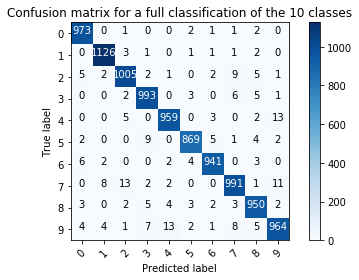

In [23]:
cm_7 = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_7, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], normalize=False, title='Confusion matrix for a full classification of the 10 classes')

e) << comment section >> 
What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

which digits are easy to recognize - 1, 5, 6
which digits are difficult to recognize - 7, 8, 9
which ones are most easily confused - (7 as 2), (9 as 4), (4 as 9) and (7 as 9) 

### Cheating

We next investigate the capability of the different learning approaches to find a good model, knowing that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [129]:
#adding cheating information to the training data:
cheatcol_train=np.array(y_bin_train) #making a copy of the original target array
cheatcol_train[cheatcol_train==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol_train[cheatcol_train==digit1]=1
cheatcol_train=cheatcol_train.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ...
x_bin_cheat_train = np.hstack((x_bin_train,cheatcol_train))

#adding cheating information to the testing data:
cheatcol_test=np.array(y_bin_test) #making a copy of the original target array
cheatcol_test[cheatcol_test==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol_test[cheatcol_test==digit1]=1
cheatcol_test=cheatcol_test.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ... 
x_bin_cheat_test = np.hstack((x_bin_test,cheatcol_test))

In [132]:
begin_time = datetime.datetime.now()
svm = SVC(kernel ='linear', cache_size=10000)
svm.fit(x_bin_cheat_train[:,-1].reshape(-1,1), y_bin_train)
print("run time for C - {} = {}".format(0.5,datetime.datetime.now() - begin_time))
print("Accuracy on training data = {}".format(svm.score(x_bin_cheat_train[:,-1].reshape(-1,1), y_bin_train)))
print("Accuracy on testing data = {}\n".format(svm.score(x_bin_cheat_test[:,-1].reshape(-1,1), y_bin_test)))

run time for C - 0.5 = 0:00:00.004553
Accuracy on training data = 1.0
Accuracy on testing data = 1.0



In [123]:
print(len(x_bin_cheat_train[:,-1]))

12665


Confusion matrix, without normalization
[[ 979    1]
 [   2 1133]]


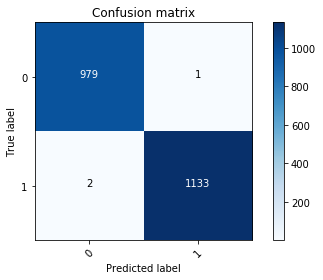

In [119]:
y_pred = svm.predict(x_bin_cheat_test)

cm = metrics.confusion_matrix(y_bin_test, y_pred)
plot_confusion_matrix(cm, ["0", "1"], normalize=False, title='Confusion matrix')

The SVM-model is, in principle, able to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters. 

**f)** Describe, briefly, how the coefficients and weights of an SVM model would have to be set, so that the resulting model is 100% accurate on this cheating data. This part of the exercise does not involve any code. Just give your answer in a short text.

**g)** Investigate how the accuracy of different SVM classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why?

# Exercise 4: Data exploration and logistic regression

In this exercise, you are going to investigate student dropout based on the dataset "churn.cvs". This is a real dataset, and there is no single "correct" way to use it (however, there are several wrong ones!). Your exercise is to explore one or more possible usecases, and document the one(s) you find the most fruitful/interesting.  Your work should probably include the steps below:

**1)** An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations? Are there problematic features or rows in the dataset?

**2)** Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).

**3)** Normalize/bin/create dummy variables where relevant. 

**4)** Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment (e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")

**5)** Train a logistic regression and at least one other algorithm on the data. Use either manual tuning or cross validation to find a good set of hyperparameters for each model. Do you see any specific advantages in using a logistic regression in this case?

**6)** What features seem to be important for predicting whether a student is likely to drop out?

Warning: Make sure you carefully consider what information is available at the time where a prediction is to be made - for example, it doesn't make any sense to try to predict if a student churns in semester 1, if you include a feature which tells that this student churned in semester 2!  So depending on your specific usecase, you should probably remove some columns and/or rows before you train your model.

**1-** An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations? Are there problematic features or rows in the dataset?

In [2]:
#loading data :
import pandas as pd
churn_data_set = pd.read_csv("churn.csv")


In [3]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': churn_data_set}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

<function matplotlib.pyplot.show(*args, **kw)>

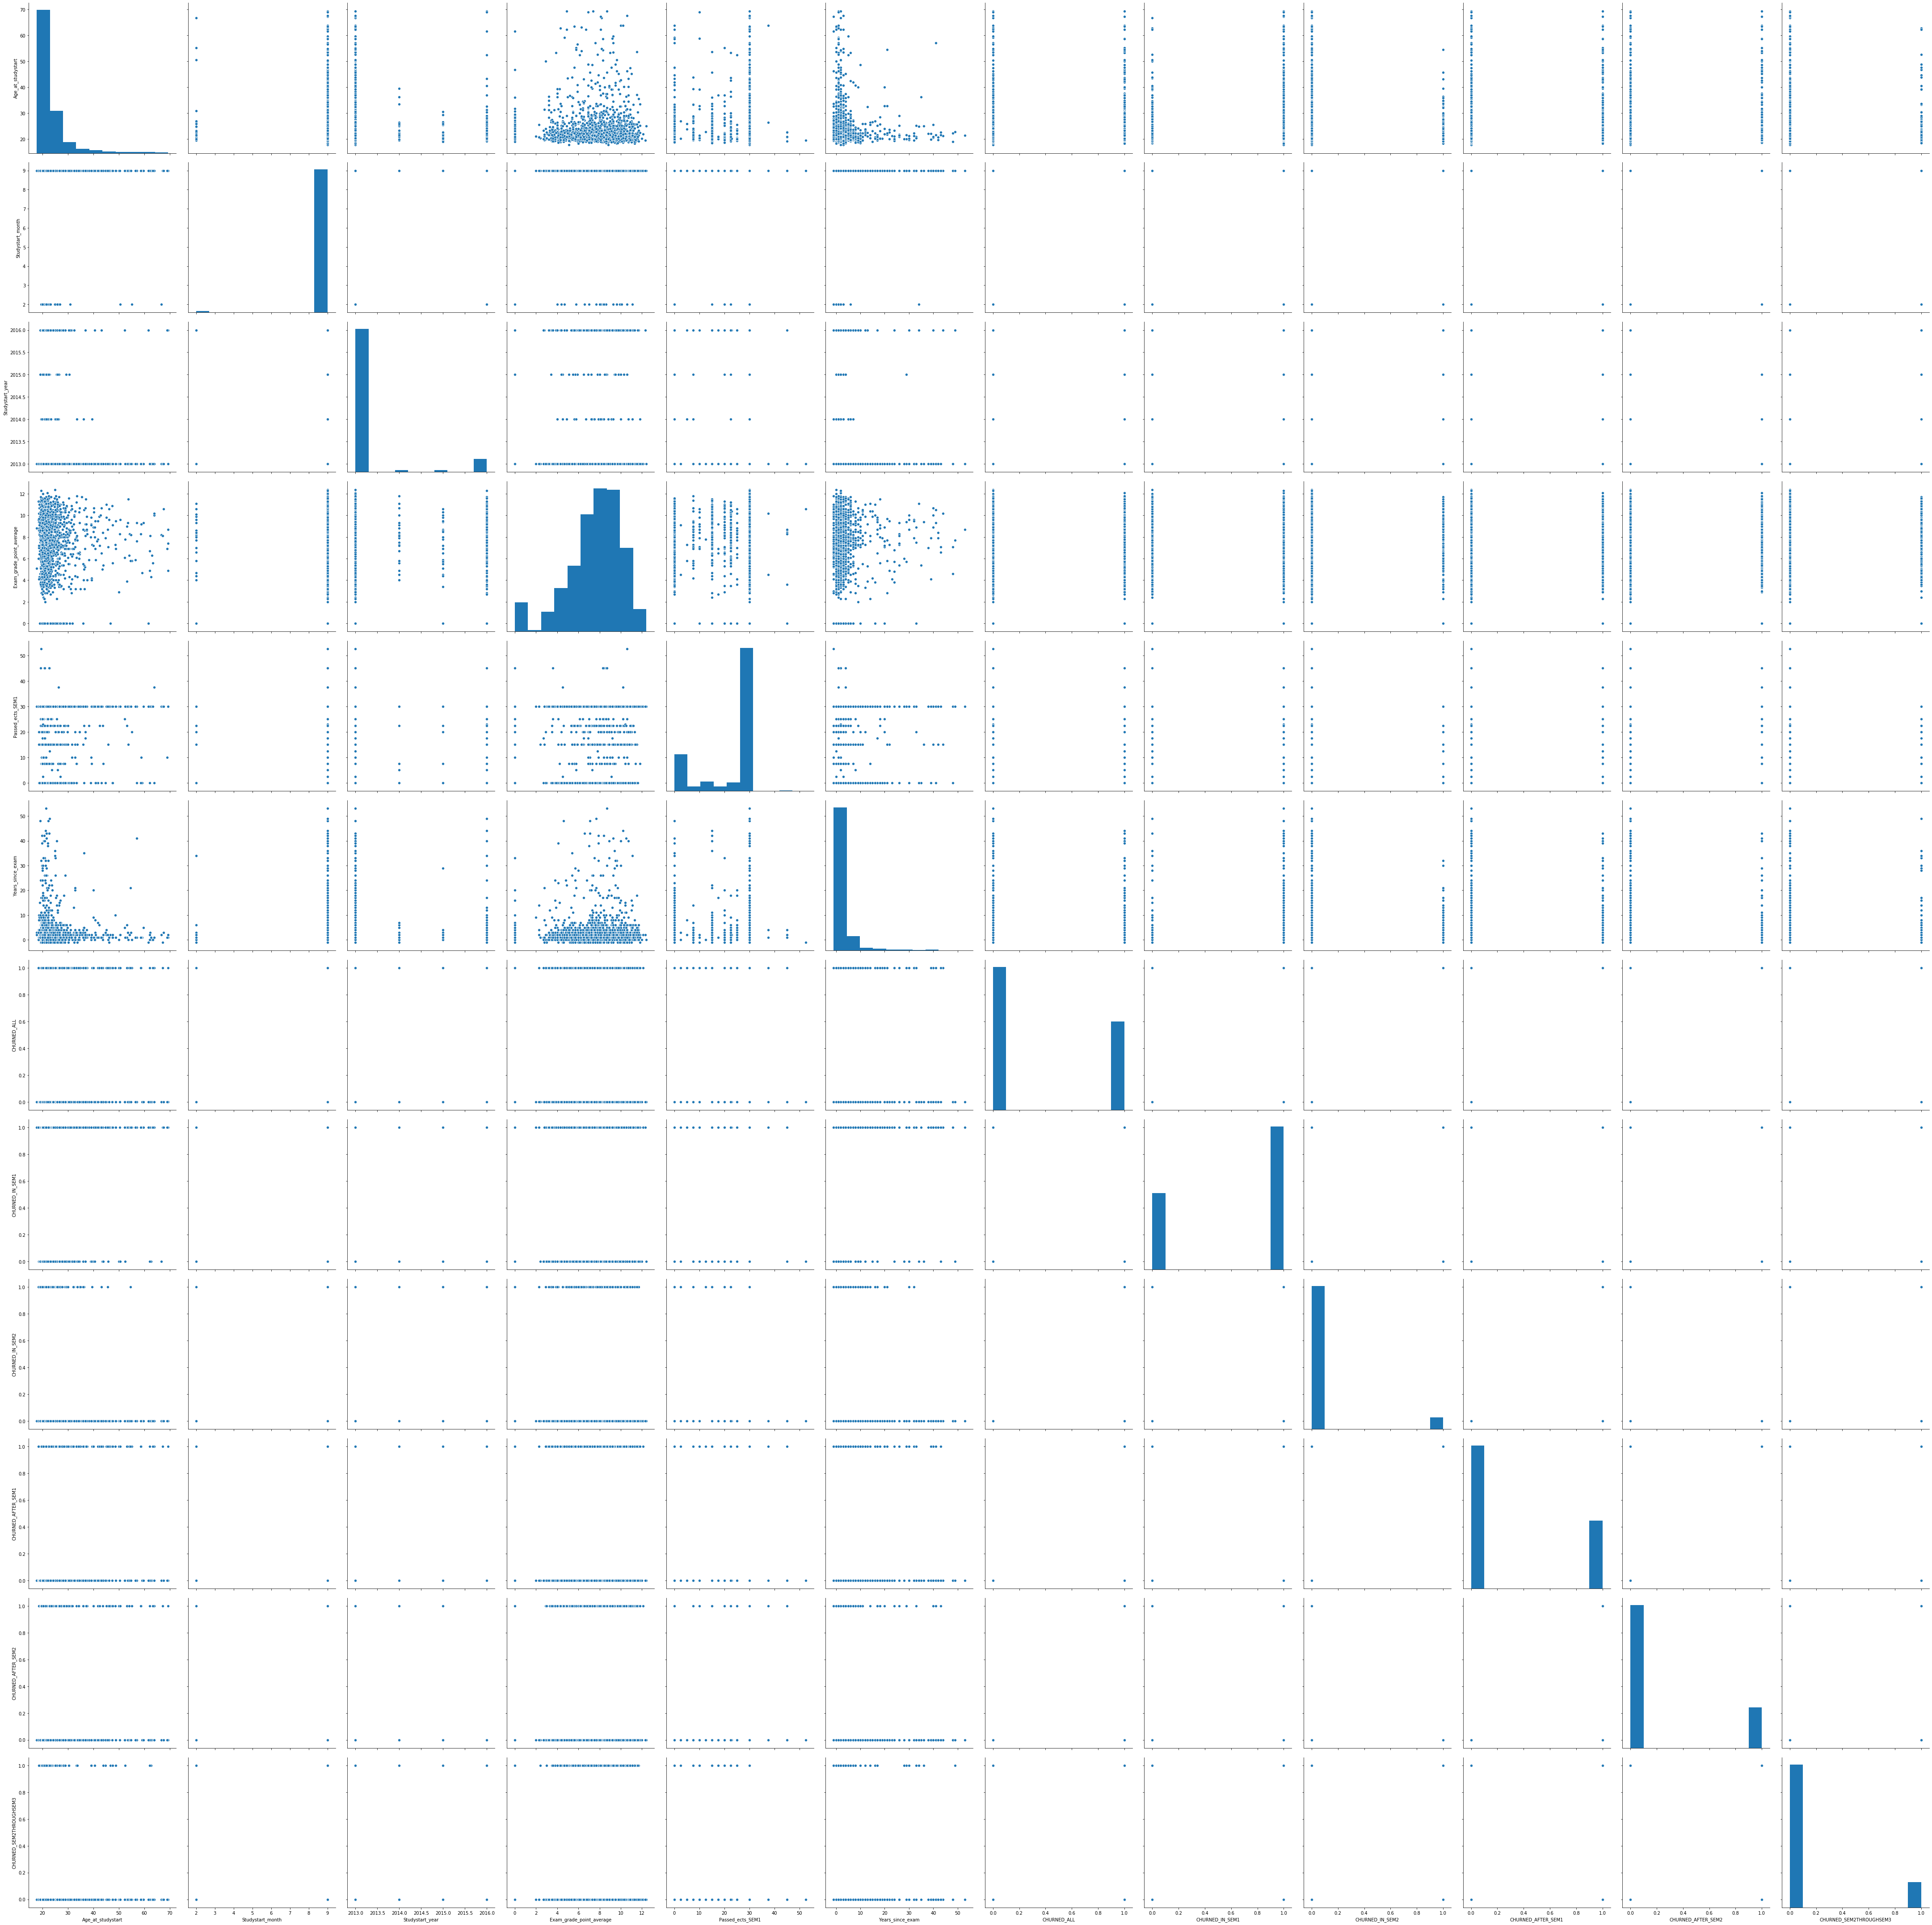

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

study_cols = ['Age_at_studystart', 'Studystart_date', 'Nationality', 'Studystart_month', 'Studystart_year', 'Status', 'Exam_grade_point_average','Grading_scale',
              'Passed_ects_SEM1', 'Years_since_exam', 'CHURNED_ALL', 'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1','CHURNED_AFTER_SEM2', 
              'CHURNED_SEM2THROUGHSEM3']

sns_plot = sns.pairplot(churn_data_set[study_cols], height=5)
sns_plot.savefig("output.png")
plt.show

In [13]:
churn_data_set.corr()

,Age_at_studystart,Studystart_month,Studystart_year,Studyend_month,Studyend_year,Exam_year,Exam_grade_point_average,Priority_number,Quote,Passed_ects_SEM1,Grade_point_average_SEM1,SU_clips_used,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
Age_at_studystart,1.000000,-0.066880,-0.002964,0.037988,-0.006379,0.040077,-0.005519,0.018716,-0.016544,0.011130,-0.037646,-0.012769,-0.023485,0.015315,0.092257,-0.001950,0.031559,0.047514,-0.043557
Studystart_month,-0.066880,1.000000,-0.052116,0.001776,0.015773,-0.023940,-0.003051,-0.054862,0.002410,0.022856,0.026576,0.015483,0.004496,0.020414,0.038020,0.010709,0.028898,0.031322,-0.011357
Studystart_year,-0.002964,-0.052116,1.000000,0.025174,0.091155,-0.001618,0.019641,0.028189,-0.008449,-0.012183,0.022482,0.009136,0.022521,-0.145166,-0.013991,0.014285,-0.151818,-0.159712,0.023368
Studyend_month,0.037988,0.001776,0.025174,1.000000,-0.352512,-0.039445,-0.001187,-0.032997,0.001912,-0.004207,-0.010853,0.004911,-0.022077,0.176731,-0.027046,-0.172566,0.101214,0.189363,-0.010689
Studyend_year,-0.006379,0.015773,0.091155,-0.352512,1.000000,0.015814,-0.024086,0.018571,-0.038130,0.031963,0.021053,-0.005077,0.000049,-0.747371,0.013186,-0.354363,-0.485114,-0.202845,-0.000349
Exam_year,0.040077,-0.023940,-0.001618,-0.039445,0.015814,1.000000,-0.011875,0.000211,-0.000046,-0.017475,0.010518,-0.030010,-0.004032,-0.017255,0.047503,0.000584,-0.023903,-0.009162,-0.041072
Exam_grade_point_average,-0.005519,-0.003051,0.019641,-0.001187,-0.024086,-0.011875,1.000000,0.016626,0.029701,-0.010346,-0.008585,-0.014771,0.005762,0.018549,-0.002076,-0.018439,0.020017,0.021130,0.014603
Priority_number,0.018716,-0.054862,0.028189,-0.032997,0.018571,0.000211,0.016626,1.000000,-0.007738,-0.057042,-0.003378,0.036219,-0.015233,0.016314,-0.008384,-0.004849,0.019692,0.020335,0.047189
Quote,-0.016544,0.002410,-0.008449,0.001912,-0.038130,-0.000046,0.029701,-0.007738,1.000000,-0.012307,0.008455,0.039949,0.061254,0.038360,0.073744,0.018192,0.042284,0.031515,-0.015435
Passed_ects_SEM1,0.011130,0.022856,-0.012183,-0.004207,0.031963,-0.017475,-0.010346,-0.057042,-0.012307,1.000000,-0.005202,0.021827,-0.033668,-0.007642,-0.041411,-0.063411,0.011663,0.047558,-0.236489


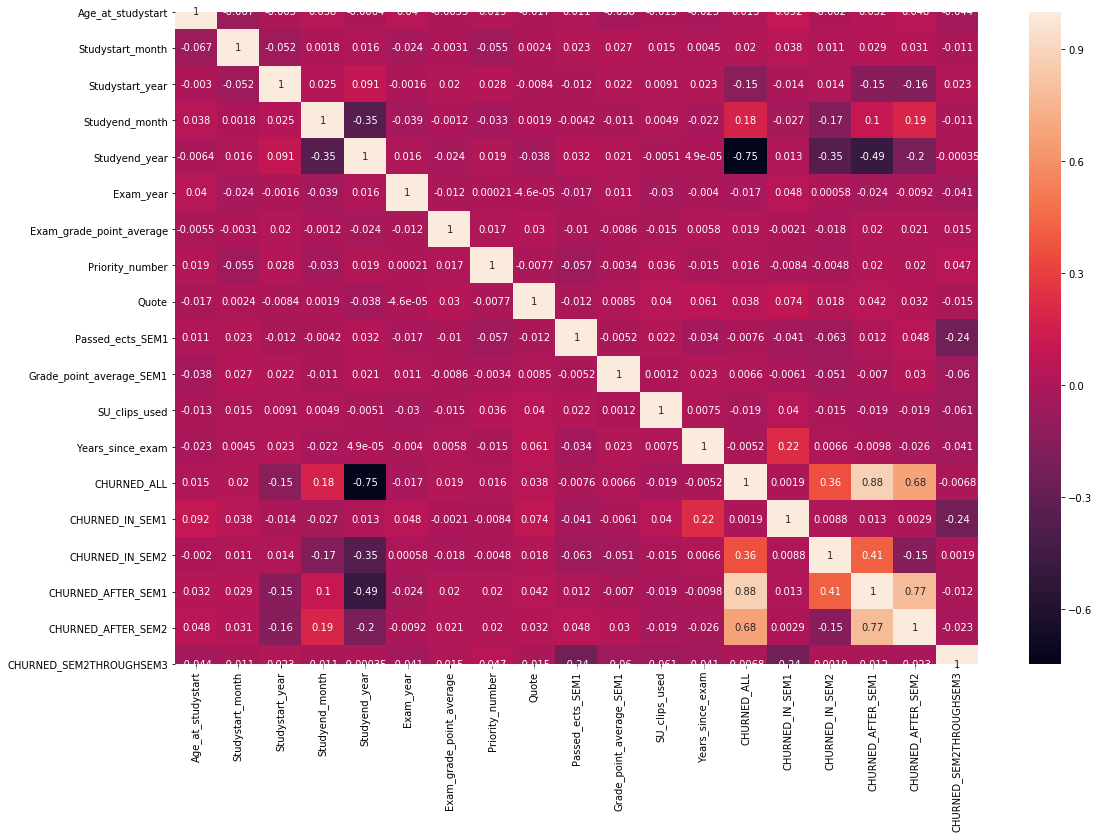

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(churn_data_set.corr(), annot=True)
plt.show()

# Display the facets overview visualization for this data   

This is the facets overview which is left de-activated but it's easy to use, just don't load both facets overview and dive at the same time in the notebook

from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [4]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = churn_data_set.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

In [5]:
churn_data_set.describe()

,Age_at_studystart,Studystart_month,Studystart_year,Studyend_month,Studyend_year,Exam_year,Exam_grade_point_average,Priority_number,Quote,Passed_ects_SEM1,Grade_point_average_SEM1,SU_clips_used,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
count,1999.000000,2000.000000,2000.000000,1492.000000,1492.000000,2000.0000,2000.000000,1999.00000,1914.000000,2000.000000,2000.000000,1145.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,23.773187,8.926500,2013.284000,6.590483,2015.248660,2007.3220,7.538250,3.14057,1.119122,23.075250,5.567560,17.107424,3.009000,0.382000,0.652000,0.075000,0.321500,0.22150,0.151000
std,6.601684,0.713689,0.850709,2.746473,1.021154,21.7738,2.568038,5.90844,0.324017,11.716723,4.015306,10.518540,5.663211,0.485998,0.476455,0.263457,0.467169,0.41536,0.358138
min,17.800000,2.000000,2013.000000,1.000000,2013.000000,1900.0000,0.000000,0.00000,1.000000,0.000000,-3.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,20.700000,9.000000,2013.000000,6.000000,2014.000000,2011.0000,6.300000,1.00000,1.000000,20.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,21.800000,9.000000,2013.000000,7.000000,2016.000000,2013.0000,8.000000,1.00000,1.000000,30.000000,6.640000,18.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,23.800000,9.000000,2013.000000,8.000000,2016.000000,2014.0000,9.300000,2.00000,1.000000,30.000000,8.880000,30.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000
max,69.400000,9.000000,2016.000000,12.000000,2017.000000,2016.0000,12.400000,24.00000,2.000000,52.500000,12.000000,42.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


**1 )** Can you find any interesting correlations? Are there problematic features or rows in the dataset?

After some examination of the data we can do some remarks about of some of the features in the data set:
    - the SU clips category contains Nulls in almost a third of the data set
    - the study programme has the 'other' label on a majority of the entries
    - some grade point averages go above the 100 mark 
    - the age_at_study_start column is using years in some instances, but it is also in months for most datapoints
    - interestingly all of the swedes churned at some point or another 

**2)** Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).

    - The SU clips would be a very interesting variable for the desired investigation on the possible educational outcomes of the different students given their access to economical support. Regretably  we have 855 NULL entries in the data set, which is 44,25% of the entries missing the data. So this column is to be deleted/ignored
    - The study end year has 500 missing entries, since they are still in the process of graduating (at least they were when this data set was collected), and since our objective is to try and predict churning during the educational process, this column is not the most relevant.
    

**3)** Normalize/bin/create dummy variables where relevant. 

**4)** Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment 
(e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")

We would like to try and predict the probability that a students churns after the end of the 2nd semester given the gpa in the first semester, their high school performance 